# Supervised Learning
 - Classification and Regression
 - Generalization, Overfitting, and Underfitting

In [5]:
import pandas as pd
import numpy as np
import mglearn 
import matplotlib.pyplot as plt

## k-Nearest Neighbors
The k-NN algorithm is arguably the simplest machine learning algorithm. Building
the model consists only of storing the training dataset. To make a prediction for a
new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”


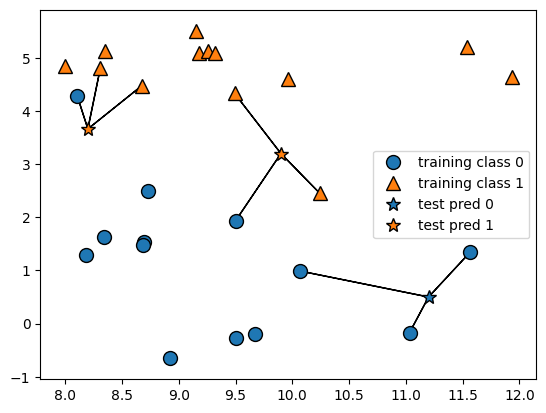

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


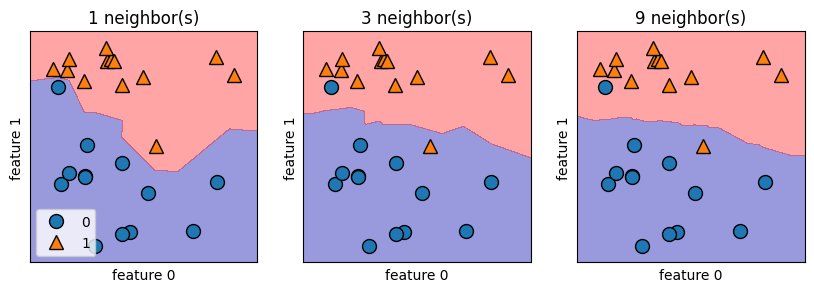

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
 # the fit method returns the object self, so we can instantiate
 # and fit in one line
 clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{} neighbor(s)".format(n_neighbors))
 ax.set_xlabel("feature 0")
 ax.set_ylabel("feature 1")
axes[0].legend(loc=3)


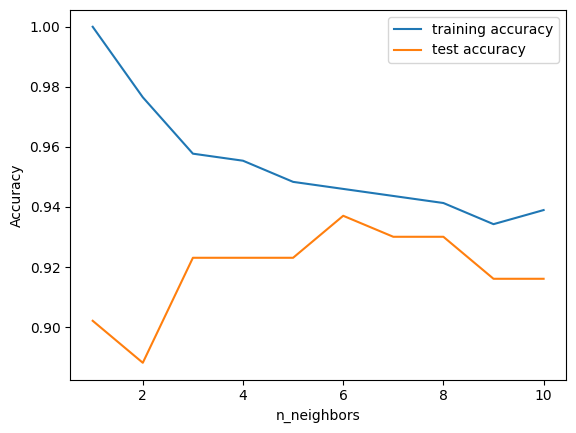

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

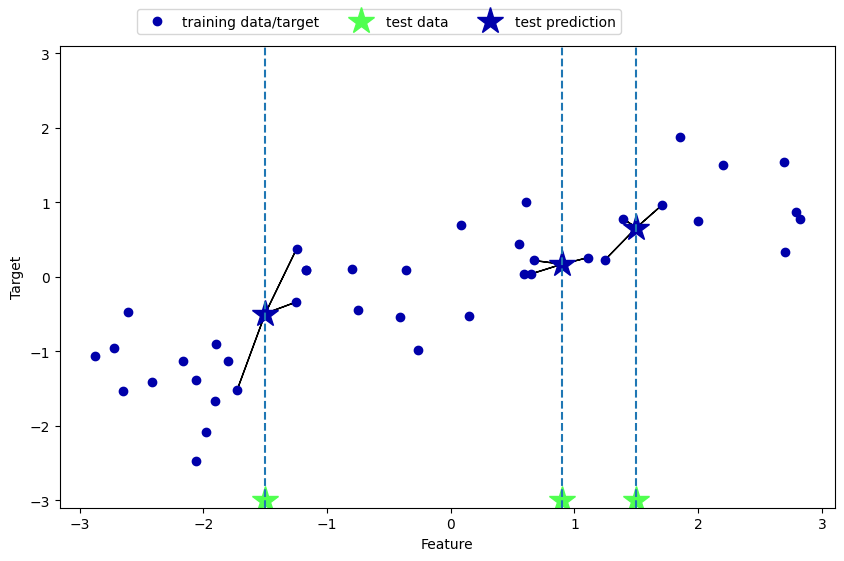

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [21]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [22]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


## Linear Models

w[0]: 0.393906  b: -0.031804


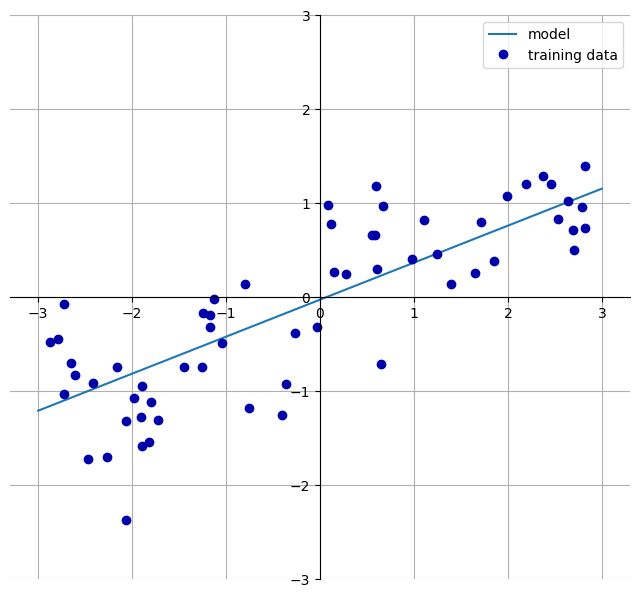

In [23]:
mglearn.plots.plot_linear_regression_wave()